In [89]:
import tensorflow as tf
import imageio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras
import PIL
from IPython import display
import os
import glob

In [90]:
len(tf.config.experimental.list_physical_devices('GPU'))

1

In [163]:
(training_images,training_labels),(testing_images,testing_labels) = tf.keras.datasets.cifar10.load_data()

In [92]:
training_images.shape

(50000, 32, 32, 3)

In [93]:
testing_images.shape

(10000, 32, 32, 3)

In [94]:
import random


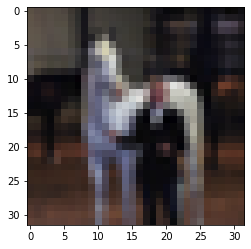

In [164]:
plt.imshow((training_images[random.randint(0,50000)]))

In [96]:
training_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [165]:
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [270]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
input_img = Input(shape=(32,32,3))  # 
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
encoder = Model(input_img,encoded)
# at this point the representation is (4, 4, 8) i.e. 128-dimensional

input_img = Input(shape = (4,4,8))
x = UpSampling2D((2,2))(input_img)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), padding='same')(x)
decoder = Model(input_img,decoded)
input_img = Input((32,32,3))
autoencoder = Model(input_img, decoder(encoder(input_img)))
autoencoder.compile(optimizer='adam', loss=root_mean_squared_error,metrics=["accuracy"])

In [218]:
  autoencoder.summary()

Model: "model_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_44 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
model_41 (Model)             (None, 4, 4, 8)           2192      
_________________________________________________________________
model_42 (Model)             (None, 32, 32, 3)         1387      
Total params: 3,579
Trainable params: 3,579
Non-trainable params: 0
_________________________________________________________________


Model: "model_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_39 (InputLayer)        (None, 4, 4, 8)           0         
_________________________________________________________________
up_sampling2d_54 (UpSampling (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 8, 8, 8)           584       
_________________________________________________________________
up_sampling2d_55 (UpSampling (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 16, 16, 8)         584       
_________________________________________________________________
up_sampling2d_56 (UpSampling (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 32, 32, 3)         219

In [202]:
autoencoder.summary()

Model: "model_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 4, 4, 8)           0  

In [169]:
training_images = training_images/255
testing_images = testing_images/255

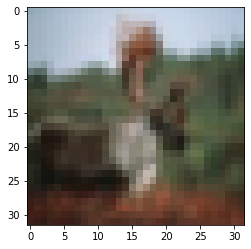

In [219]:
plt.imshow((training_images[random.randint(0,50000)]))

In [171]:

# updatable plot
# a minimal example (sort of)

class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [ ]:
history = autoencoder.fit(training_images,training_images,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(testing_images,testing_images),
                verbose=True)

In [275]:
encoder.save("/content/encoder-weights.h5")

In [222]:
decoder.summary()

Model: "model_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_43 (InputLayer)        (None, 4, 4, 8)           0         
_________________________________________________________________
up_sampling2d_60 (UpSampling (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 8, 8, 8)           584       
_________________________________________________________________
up_sampling2d_61 (UpSampling (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_142 (Conv2D)          (None, 16, 16, 8)         584       
_________________________________________________________________
up_sampling2d_62 (UpSampling (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_143 (Conv2D)          (None, 32, 32, 3)         219

In [223]:
a = autoencoder.predict(np.expand_dims(testing_images[0],axis=0))

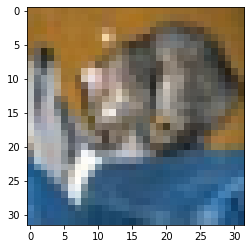

In [224]:
plt.imshow(testing_images[0])

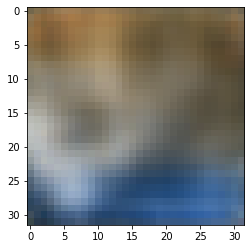

In [225]:
plt.imshow(np.squeeze(a))

In [183]:
encoder = Model(input_img,encoded)

In [276]:
encoded_imgs = encoder.predict(testing_images)

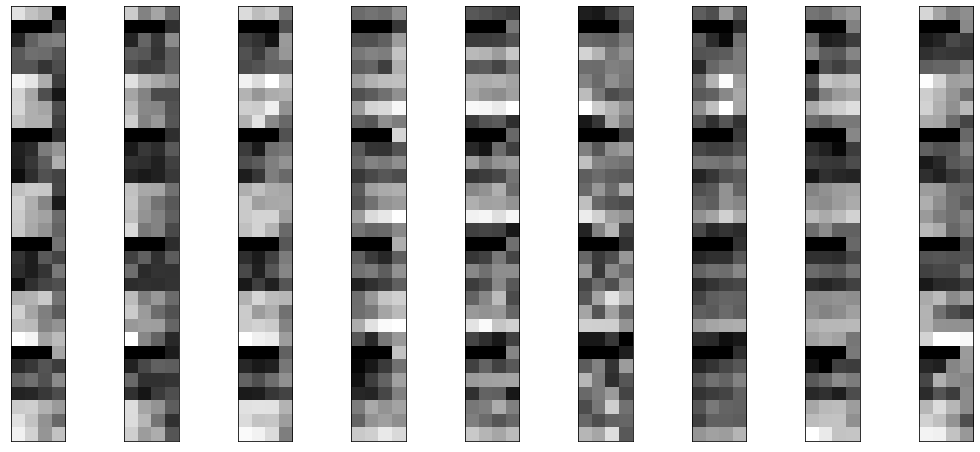

In [277]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [278]:
decoded_imgs = decoder.predict(encoded_imgs)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


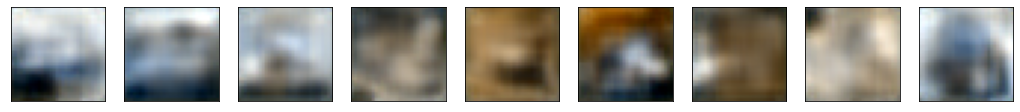

In [279]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(decoded_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [296]:
final_model = Sequential()

In [297]:

final_model.add(Conv2D(16, (3, 3), activation='relu', padding='same',input_shape = (32,32,3)))
final_model.add(MaxPooling2D((2, 2), padding='same'))
final_model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
final_model.add(MaxPooling2D((2, 2), padding='same'))
final_model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
final_model.add(MaxPooling2D((2, 2), padding='same'))
final_model.load_weights("/content/encoder-weights.h5")
for layer in final_model.layers:
  layer.trainable = False
final_model.add(Flatten())
final_model.add(Dense(128,activation="relu"))
final_model.add(Dense(10,activation="softmax"))

In [298]:
final_model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_153 (Conv2D)          (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_154 (Conv2D)          (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_155 (Conv2D)          (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 4, 4, 8)           0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 128)             

In [299]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
y_train = keras.utils.to_categorical(training_labels, num_classes)
y_test = keras.utils.to_categorical(testing_labels, num_classes)

In [247]:
x_train = training_images
x_test = testing_images

In [301]:
final_model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [268]:
final_model.layers

In [249]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [302]:
final_model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 180us/step - loss: 1.9136 - accuracy: 0.3178 - val_loss: 1.7924 - val_accuracy: 0.3716
Epoch 2/100
50000/50000 [==============================] - 10s 198us/step - loss: 1.7425 - accuracy: 0.3808 - val_loss: 1.6829 - val_accuracy: 0.4021
Epoch 3/100
50000/50000 [==============================] - 9s 178us/step - loss: 1.6707 - accuracy: 0.4081 - val_loss: 1.6339 - val_accuracy: 0.4151
Epoch 4/100
50000/50000 [==============================] - 9s 176us/step - loss: 1.6236 - accuracy: 0.4244 - val_loss: 1.6120 - val_accuracy: 0.4237
Epoch 5/100
50000/50000 [==============================] - 9s 176us/step - loss: 1.5889 - accuracy: 0.4369 - val_loss: 1.5800 - val_accuracy: 0.4368
Epoch 6/100
50000/50000 [==============================] - 9s 176us/step - loss: 1.5653 - accuracy: 0.4435 - val_loss: 1.5516 - val_accuracy: 0.4480
Epoch 7/100
50000/50000 [==============================

KeyboardInterrupt: ignored

In [ ]:
#as you can see the encoder and decoder architecture are quite small we get less accuracy and also cifar 10 is 32 x 32 x 3 low resolution images so try to add more layers to the model